# Is it a Propellor or Jet Aeroplane?

## Install Dependencies

In [2]:
!pip install -Uqq fastai

In [3]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 18.5 MB/s eta 0:00:00


In [8]:
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from fastbook import *
import time
import os
import pathlib
import shutil

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Test Image Download Function

In [ ]:
#using Fastbook Duck Duck Go image download function
urls = search_images_ddg('propeller aeroplane photos', max_images=1)
urls[0]

'https://thumbs.dreamstime.com/z/old-propeller-airplane-22024425.jpg'

In [ ]:
def get_image(search_term, num_images, destination):
    download_url(search_images_ddg(search_term, max_images=num_images)[0], destination, show_progress=False)
    return Image.open(destination).to_thumb(256,256)

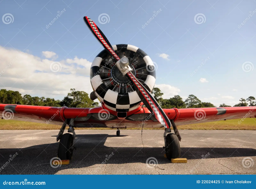

In [ ]:
prop_path = './drive/MyDrive/ColabNotebooks/FastaiCourse/Lesson_1/prop_test.jpg'
prop_test = get_image('propeller aeroplane photos', 1, prop_path)
prop_test

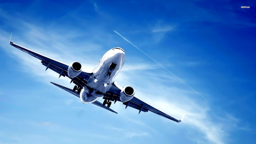

In [ ]:
jet_path = './drive/MyDrive/ColabNotebooks/FastaiCourse/Lesson_1/jet_test.jpg'
jet_test = get_image('jet aeroplane photos', 1, jet_path)
jet_test

# Download Images for Multiple Image Categories



In [ ]:
# Download images of different image categories and save
def download_images_ddg(img_category, img_type, path, num_images):
    if not path.exists():
        path.mkdir()
        for o in img_types:
            dest = (path/o)
            dest.mkdir(exist_ok=True)
            results = search_images_ddg(f'{str(o)} aeroplane photos', max_images=num_images)
            for u in range(len(results)):
                try:
                    download_url(url=results[u],
                                 dest=f'{dest}/{str(o)}-{str(u+1)}.jpg',
                                 timeout=10,
                                 show_progress=False)
                except:
                    print(f'not found {results[u]}')
                    continue

In [ ]:
# Define image category and image types and pth to storage location
img_category = 'prop_jet'
img_types = ['propeller','jet']
lesson_path = './drive/MyDrive/ColabNotebooks/FastaiCourse/Lesson_1/'
path = Path(f'{lesson_path}/{img_category}')

In [ ]:
# Call function to download images for each image type
for img_type in img_types:
 download_images_ddg(img_category, img_type, path, num_images=100)

not found http://kingairnation.com/wp-content/uploads/2013/02/Prop7.jpeg
not found https://timedotcom.files.wordpress.com/2018/07/propeller-airplanes.jpg?quality=85
not found https://www.alamy.com/aggregator-api/download?url=https://c8.alamy.com/comp/D45514/lockheed-electra-12a-twin-propeller-airplane-D45514.jpg
not found http://www.catersnews.com/wp-content/uploads/2018/07/5_CATERS_jets_riat_006.jpg
not found https://cdn-image.travelandleisure.com/sites/default/files/styles/1600x1000/public/1484322204/boeing-737-max-airplane-NEWPLANE0117.jpg?itok=qiAxXa2O


In [ ]:
# Check for failed images
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);
len(failed)

6

# Dataloder using a DataBlock

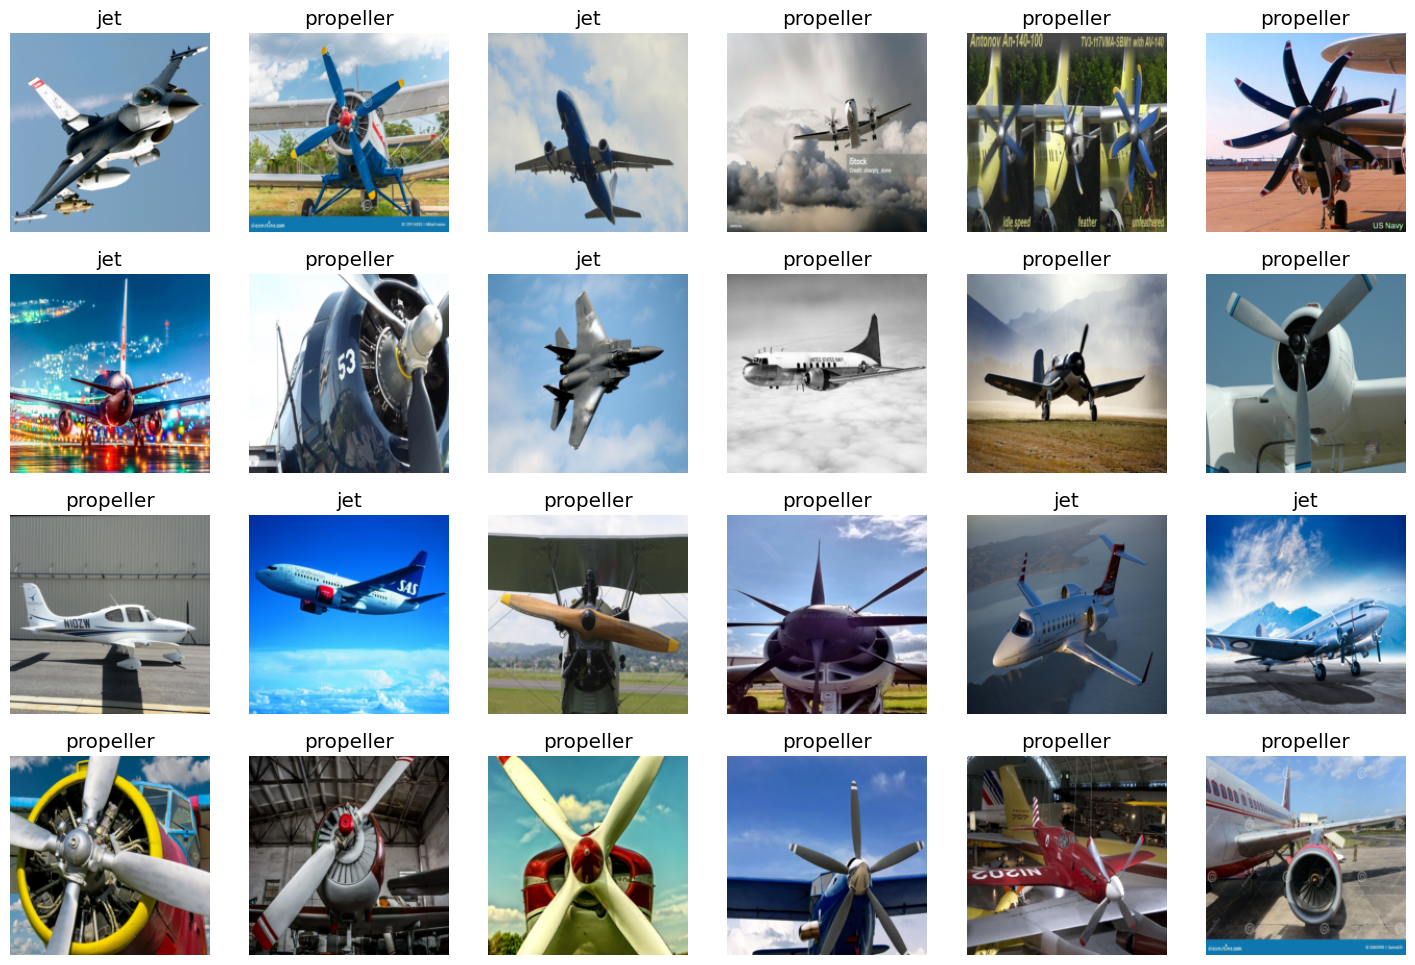

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=24)

# Implement Learning Model

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 136MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.431354,2.190867,0.567568,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.653742,0.935298,0.351351,00:16
1,0.421219,0.581888,0.162162,00:16
2,0.306166,0.502692,0.162162,00:17


# Check Model With Sample

This is a: propeller aeroplane.
Probability it's a propeller aeroplane: 0.9307


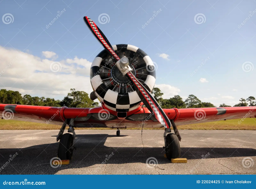

In [ ]:
plane_type,_,probs = learn.predict(PILImage.create(prop_path))
print(f"This is a: {plane_type} aeroplane.")
if _ == 1:
  #print(_ == 1)
  print(f"Probability it's a propeller aeroplane: {probs[1]:.4f}")
else:
  print(f"Probability it's a jet aeroplane: {probs[0]:.4f}")
prop_test

This is a: jet aeroplane.
Probability it's a jet aeroplane: 1.0000


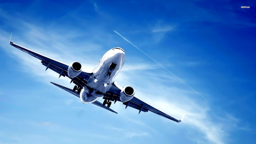

In [ ]:
plane_type,_,probs = learn.predict(PILImage.create(jet_path))
print(f"This is a: {plane_type} aeroplane.")
if _ == 1:
  #print(_ == 1)
  print(f"Probability it's a propeller aeroplane: {probs[1]:.4f}")
else:
  print(f"Probability it's a jet aeroplane: {probs[0]:.4f}")
jet_test

In [ ]:
learn.predict(PILImage.create(prop_path))

('propeller', tensor(1), tensor([0.0693, 0.9307]))

In [ ]:
learn.predict(PILImage.create(jet_path))

('jet', tensor(0), tensor([9.9997e-01, 3.2517e-05]))

# Sync with Github

In [19]:
%pwd

'/content/drive/MyDrive/ColabNotebooks'

In [22]:
%cd '/content/drive/MyDrive/ColabNotebooks/FastaiColabNotebooks'

/content/drive/MyDrive/ColabNotebooks/FastaiColabNotebooks


In [23]:
%ls -a

.git/  .ipynb_checkpoints/  Lesson_1/  LICENSE  README.md


In [26]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   Lesson_1/L1_Prop_Or_Jet_Plane.ipynb



In [25]:
!git add .

In [ ]:
!git commit -m "Modified Notebook"

In [ ]:
!git push

# Delete Files and Folders

In [ ]:
#%pwd

In [ ]:
#%cd ..

In [ ]:
#%cd drive/MyDrive/ColabNotebooks/FastaiCourse/Lesson_1

In [ ]:
#shutil.rmtree('bird_forest')